In [ ]:
# Install dependencies
!pip install -U scikit-learn
!pip install pandas
!pip install xgboost

# **All About Trees Workshop**

# **Preparing the Data**

## Reading dataset

Firstly, we need to load the dataset into your coding environment. We will be doing this with the Pandas package.

In [ ]:
import pandas as pd

data = pd.read_csv('/content/diabetes_binary_5050split.csv')
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [ ]:
X = data.drop('Diabetes_binary', axis=1)
y = data['Diabetes_binary']

## Train-Test Split

In Machine Learning projects, it is a good practice to train your models on some data, and leave a subset for evaluating the performance of your model. The sklearn `train_test_split` function makes it easy for you to do that. In the snippet below, we used a 80-20 train test split. (test_size = 0.2)

In [ ]:
from sklearn.model_selection import train_test_split

# random_state param to set a seed for replicable results.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Models**
We will be exploring 3 models:
1. Decision Tree
2. Random Forest
3. XGBoost

## **Decision Tree**

- **criterion** {“gini”, “entropy”, “log_loss”}, default=”gini”
    
    Allows you to select which method used by tree to create splits in dataset. More information can be found here: https://scikit-learn.org/dev/modules/tree.html#tree-mathematical-formulation

- **max_depth**, default=None

    The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

- **min_samples_split**, default=2

    The minimum number of samples required to split an internal node.

- **min_samples_leaf**, default=1

    The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches.

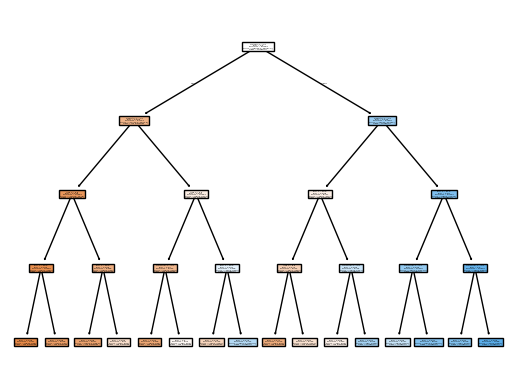

In [ ]:
from matplotlib import pyplot as plt
from sklearn import tree

# Create decision tree classifier and train
clf = tree.DecisionTreeClassifier(max_depth = 4, random_state=42)
clf.fit(X_train, y_train)

# Generate plot of tree for visualisation of tree model
tree.plot_tree(clf, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], filled=True)

# Write plot to pdf to zoom in
plt.savefig('out.pdf')

In [ ]:
import numpy as np

# Generate predictions on test data
y_pred_dt = clf.predict(X_test)

# Generate prediction for one entry
prediction = clf.predict(np.array([1.0, 1.0, 1.0, 26.0, 1.0, 1.0, 0.0,
                                   0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 3.0,
                                   0.0, 0.0, 0.0, 1.0, 12.0, 6.0, 8.0]).reshape(1, -1))
print("Prediction:", prediction[0])

Prediction: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Lets try other parameters!

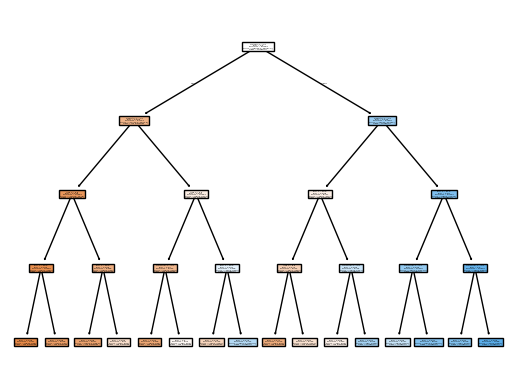

In [ ]:
# Initialise Decision Tree Model
### WRITE CODE HERE ###

# Generate plot of tree for visualisation of tree model
tree.plot_tree(clf, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], filled=True)

# Write plot to pdf to zoom in
plt.savefig('out2.pdf')

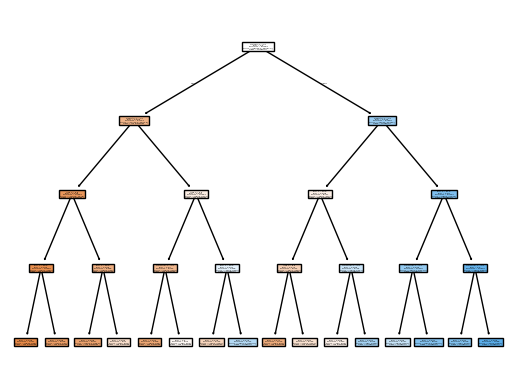

In [ ]:
# Initialise Decision Tree Model
### WRITE CODE HERE ###

# Generate plot of tree for visualisation of tree model
tree.plot_tree(clf, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], filled=True)

# Write plot to pdf to zoom in
plt.savefig('out3.pdf')

## **Random Forest**

Random forest models are an improvement from decision tree models to achieve better predictive accuracy. It uses ensembling to reduce overfitting. In addition to parameters in decision tree model, there are additional parameters that control ensembling:

- **n_estimators** int, default=100
  
  Number of decision trees in ensemble 'voting system'.

- **bootstrap** bool, default=True

  Bootstrap sampling or use whole dataset to train each tree

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest_clf = RandomForestClassifier(max_depth=4, random_state=42)
random_forest_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, random_state=42)

In [ ]:
# Generate predictions on test data
y_pred_rf = random_forest_clf.predict(X_test)

# Generate prediction for one entry
prediction = random_forest_clf.predict(np.array([1.0, 1.0, 1.0, 26.0, 1.0, 1.0, 0.0,
                                                0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 3.0,
                                                0.0, 0.0, 0.0, 1.0, 12.0, 6.0, 8.0]).reshape(1, -1))
print("Prediction:", prediction[0])

Prediction: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Let's try more parameters!

In [ ]:
## What if we increase n_estimators? Try 500, what happens to training time?

In [ ]:
## What about 'boostrap=False'?

## **XGBoost**

XGBoost models are an improvement from decision tree models to achieve better predictive accuracy.
It is a very efficient and optimised implementation of the gradient boosting algorithm, which is an ensemble learning method that combines multiple weak learners to create a stronger model.


**Basic XGBoost model without Hyperparameter Tuning**

In [ ]:
from xgboost import XGBClassifier

# Initialise a basic xgboost model
xgb_clf = XGBClassifier()

# Fit the xgboost model to the training data
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Generate predictions on test data
y_pred_xg = xgb_clf.predict(X_test)

# Generate prediction for one entry
prediction = xgb_clf.predict(np.array([1.0, 1.0, 1.0, 26.0, 1.0, 1.0, 0.0,
                                        0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 3.0,
                                        0.0, 0.0, 0.0, 1.0, 12.0, 6.0, 8.0]).reshape(1, -1))
print("Prediction:", prediction[0])

Prediction: 0


**XGBoost model with Hyperparameter Tuning**

Hyperparamters can be used to fine-tune the model to improve model performance. Here are a few common hyperparameters we can use:


- **n_estimators**, default=100

    Number of gradient boosted trees. Equivalent to number of boosting rounds.


- **max_depth**, default=6

    Maximum depth of the tree. Increasing this value will make the model more complex and more likely to overfit. 0 indicates no limit on depth.

- **learning_rate**, default=0.3

    Boosting learning rate. It determines how much the model's weights are adjusted during training, controlling how quickly or slowly the model learns the data.

- **subsample**, default=1

    Proportion of the training data that is randomly sampled to train each tree. Setting it to 0.5 means that XGBoost would randomly sample half of the training data prior to growing trees. and this will prevent overfitting. Subsampling will occur once for every tree constructed.

- **colsample_bytree**, default=1

    Fraction of features to be randomly sampled for building each tree. Subsampling occurs once for every tree constructed.


**Explore More !!**

Try fine-tuning the model yourself by changing the values within param_grid below and running the code!

Note that this code block will require some time to run.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search (Edit the hyperparameters values here!)
param_grid = {
    'n_estimators': [120, 150, 170],        # Number of trees
    'max_depth': [3, 5, 7],                 # Maximum depth of the trees
    'learning_rate': [0.01, 0.1, 0.2],      # Step size shrinkage
    'subsample': [0.6, 0.8, 1.0],           # Fraction of samples for each tree
    'colsample_bytree': [0.6, 0.8, 1.0],    # Fraction of features for each tree
}

# Perform grid search
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid,
                           cv=3, n_jobs=-1, scoring='accuracy', verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Generate predictions on test data with the best parameters
best_xgb = grid_search.best_estimator_
y_pred_txg = best_xgb.predict(X_test)

# Generate prediction for one entry
prediction = best_xgb.predict(np.array([1.0, 1.0, 1.0, 26.0, 1.0, 1.0, 0.0,
                                        0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 3.0,
                                        0.0, 0.0, 0.0, 1.0, 12.0, 6.0, 8.0]).reshape(1, -1))
print("Prediction:", prediction[0])

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150, 'subsample': 0.6}
Prediction: 1


# **Model Evaluation**


## **Classification Report & Accuracy**

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
# Generate classification report
target_names = ['No Diabetes', 'Diabetes']
report_dt = classification_report(y_test, y_pred_dt, target_names=target_names)
print(report_dt)

# Evaluate the accuracy of the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy of the Decision Tree model: {accuracy_dt:.2f}")

              precision    recall  f1-score   support

 No Diabetes       0.74      0.70      0.72      7090
    Diabetes       0.71      0.76      0.74      7049

    accuracy                           0.73     14139
   macro avg       0.73      0.73      0.73     14139
weighted avg       0.73      0.73      0.73     14139

Accuracy of the Decision Tree model: 0.73


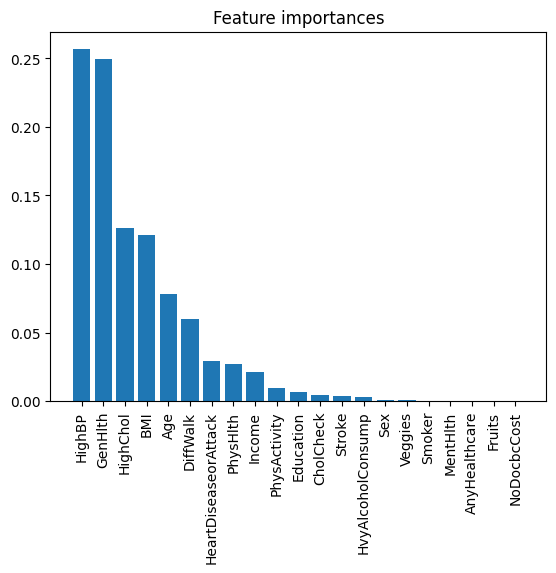

In [ ]:
import matplotlib.pyplot as plt
importances = random_forest_clf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()

In [ ]:
# Generate classification report
target_names = ['No Diabetes', 'Diabetes']
report_dt = classification_report(y_test, y_pred_dt, target_names=target_names,output_dict=True)
print(report_dt)

# Evaluate the accuracy of the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy of the Decision Tree model: {accuracy_dt:.2f}")

{'No Diabetes': {'precision': 0.74449804039795, 'recall': 0.6966149506346968, 'f1-score': 0.7197610026231419, 'support': 7090.0}, 'Diabetes': {'precision': 0.7133910726182545, 'recall': 0.7595403603347992, 'f1-score': 0.7357427511337089, 'support': 7049.0}, 'accuracy': 0.7279864205389348, 'macro avg': {'precision': 0.7289445565081023, 'recall': 0.728077655484748, 'f1-score': 0.7277518768784255, 'support': 14139.0}, 'weighted avg': {'precision': 0.7289896582012548, 'recall': 0.7279864205389348, 'f1-score': 0.727728705095098, 'support': 14139.0}}
Accuracy of the Decision Tree model: 0.73


In [ ]:
# Generate classification report
target_names = ['No Diabetes', 'Diabetes']
report_rf = classification_report(y_test, y_pred_rf, target_names=target_names,output_dict=True)
print(report_rf)

# Evaluate the accuracy of the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of the Random Forest model: {accuracy_rf:.2f}")

{'No Diabetes': {'precision': 0.7616929918724122, 'recall': 0.7005641748942172, 'f1-score': 0.7298508559253545, 'support': 7090.0}, 'Diabetes': {'precision': 0.7213179312155421, 'recall': 0.7795431976166832, 'f1-score': 0.7493011522465398, 'support': 7049.0}, 'accuracy': 0.7399391753306457, 'macro avg': {'precision': 0.7415054615439771, 'recall': 0.7400536862554502, 'f1-score': 0.7395760040859471, 'support': 14139.0}, 'weighted avg': {'precision': 0.741564000955779, 'recall': 0.7399391753306457, 'f1-score': 0.7395478032885369, 'support': 14139.0}}
Accuracy of the Random Forest model: 0.74


In [ ]:
# Generate classification report
target_names = ['No Diabetes', 'Diabetes']
report_xg = classification_report(y_test, y_pred_xg, target_names=target_names,output_dict=True)
print(report_xg)

# Evaluate the accuracy of the model
accuracy_xg = accuracy_score(y_test, y_pred_xg)
print(f"Accuracy of the XGBoost model without hyperparameter tuning: {accuracy_xg:.2f}")

{'No Diabetes': {'precision': 0.7723978411719352, 'recall': 0.7064880112834979, 'f1-score': 0.7379742173112339, 'support': 7090.0}, 'Diabetes': {'precision': 0.7281160177684871, 'recall': 0.7906085969641083, 'f1-score': 0.75807658301027, 'support': 7049.0}, 'accuracy': 0.7484263384963576, 'macro avg': {'precision': 0.7502569294702112, 'recall': 0.7485483041238031, 'f1-score': 0.748025400160752, 'support': 14139.0}, 'weighted avg': {'precision': 0.7503211332597133, 'recall': 0.7484263384963576, 'f1-score': 0.7479962539342274, 'support': 14139.0}}
Accuracy of the XGBoost model without hyperparameter tuning: 0.75


In [ ]:
# Generate classification report
target_names = ['No Diabetes', 'Diabetes']
report_txg = classification_report(y_test, y_pred_txg, target_names=target_names,output_dict=True)
print(report_txg)

# Evaluate the accuracy of the model
accuracy_txg = accuracy_score(y_test, y_pred_txg)
print(f"Accuracy of the XGBoost model with hyperparameter tuning: {accuracy_txg:.2f}")

{'No Diabetes': {'precision': 0.776508226691042, 'recall': 0.7188998589562764, 'f1-score': 0.7465944045700893, 'support': 7090.0}, 'Diabetes': {'precision': 0.7368976897689768, 'recall': 0.7918853738118882, 'f1-score': 0.763402625820569, 'support': 7049.0}, 'accuracy': 0.7552867953886413, 'macro avg': {'precision': 0.7567029582300094, 'recall': 0.7553926163840823, 'f1-score': 0.7549985151953291, 'support': 14139.0}, 'weighted avg': {'precision': 0.7567603891662072, 'recall': 0.7552867953886413, 'f1-score': 0.7549741451171317, 'support': 14139.0}}
Accuracy of the XGBoost model with hyperparameter tuning: 0.76


## **Performance Comparison of Models**

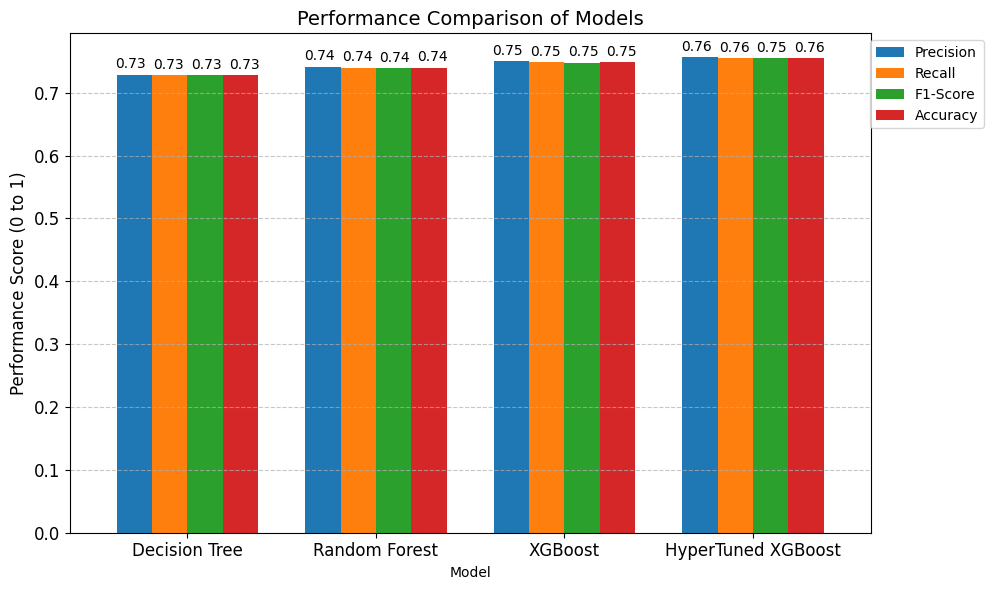

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load your weighted avg scores
metrics = {
    'Model': ['Decision Tree', 'Random Forest', 'XGBoost', 'HyperTuned XGBoost'],
    'Precision': [
        report_dt['weighted avg']['precision'],
        report_rf['weighted avg']['precision'],
        report_xg['weighted avg']['precision'],
        report_txg['weighted avg']['precision']
    ],
    'Recall': [
        report_dt['weighted avg']['recall'],
        report_rf['weighted avg']['recall'],
        report_xg['weighted avg']['recall'],
        report_txg['weighted avg']['recall']
    ],
    'F1-Score': [
        report_dt['weighted avg']['f1-score'],
        report_rf['weighted avg']['f1-score'],
        report_xg['weighted avg']['f1-score'],
        report_txg['weighted avg']['f1-score']
    ],
    'Accuracy': [
        accuracy_dt,
        accuracy_rf,
        accuracy_xg,
        accuracy_txg
    ]
}

# Convert metrics to DataFrame
df_metrics = pd.DataFrame(metrics)
df_metrics.set_index('Model', inplace=True)

# Customising color (Can be changed based on preference)
color_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Plot the metrics as a grouped bar chart
ax = df_metrics.plot(kind='bar', figsize=(10, 6), color=color_palette, width=0.75)

# Add plot labels and title
plt.title('Performance Comparison of Models', fontsize=14)
plt.ylabel('Performance Score (0 to 1)', fontsize=12)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add labels on top of bars
for i in range(len(df_metrics)):
    for j in range(len(df_metrics.columns)):
        plt.text(i + j*0.2 - 0.3, df_metrics.iloc[i, j] + 0.01, round(df_metrics.iloc[i, j], 2), ha='center')

# Move the legend outside the plot
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

# Show plot
plt.tight_layout()
plt.show()

## **Fitness of a Model**

Overfit? Underfit? or Well fitted?

Fitness of the model can be identified by comparing the model's performance between the train set and test set.

* Underfitting: Poor training and testing results

* Overfitting: Very good training results and poor testing result

* Well-fitted: Good training result and similar testing results

In [ ]:
model = RandomForestClassifier()  # Replace with your model
model.fit(X_train, y_train)

# 2. Predict on both training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 3. Generate performance metrics (classification report) for both sets
train_report = classification_report(y_train, y_train_pred, output_dict=True)
test_report = classification_report(y_test, y_test_pred, output_dict=True)

# 4. Extract weighted averages for Precision, Recall, F1-Score, and Accuracy
train_precision = train_report['weighted avg']['precision']
train_recall = train_report['weighted avg']['recall']
train_f1 = train_report['weighted avg']['f1-score']
train_accuracy = train_report['accuracy']

test_precision = test_report['weighted avg']['precision']
test_recall = test_report['weighted avg']['recall']
test_f1 = test_report['weighted avg']['f1-score']
test_accuracy = test_report['accuracy']

# Print the results to compare
print(f"Training Set Performance: Precision: {train_precision:.2f}, Recall: {train_recall:.2f}, F1-Score: {train_f1:.2f}, Accuracy: {train_accuracy:.2f}")
print(f"Test Set Performance: Precision: {test_precision:.2f}, Recall: {test_recall:.2f}, F1-Score: {test_f1:.2f}, Accuracy: {test_accuracy:.2f}")

# Calculate performance differences between training and test set
precision_diff = train_precision - test_precision
recall_diff = train_recall - test_recall
f1_diff = train_f1 - test_f1
accuracy_diff = train_accuracy - test_accuracy

# Output the difference between training and test set performance
print(f"\nDifference between Training and Test Set:")
print(f"Precision Diff: {precision_diff:.2f}, Recall Diff: {recall_diff:.2f}, F1-Score Diff: {f1_diff:.2f}, Accuracy Diff: {accuracy_diff:.2f}")

Training Set Performance: Precision: 1.00, Recall: 1.00, F1-Score: 1.00, Accuracy: 1.00
Test Set Performance: Precision: 0.74, Recall: 0.74, F1-Score: 0.74, Accuracy: 0.74

Difference between Training and Test Set:
Precision Diff: 0.26, Recall Diff: 0.26, F1-Score Diff: 0.26, Accuracy Diff: 0.26


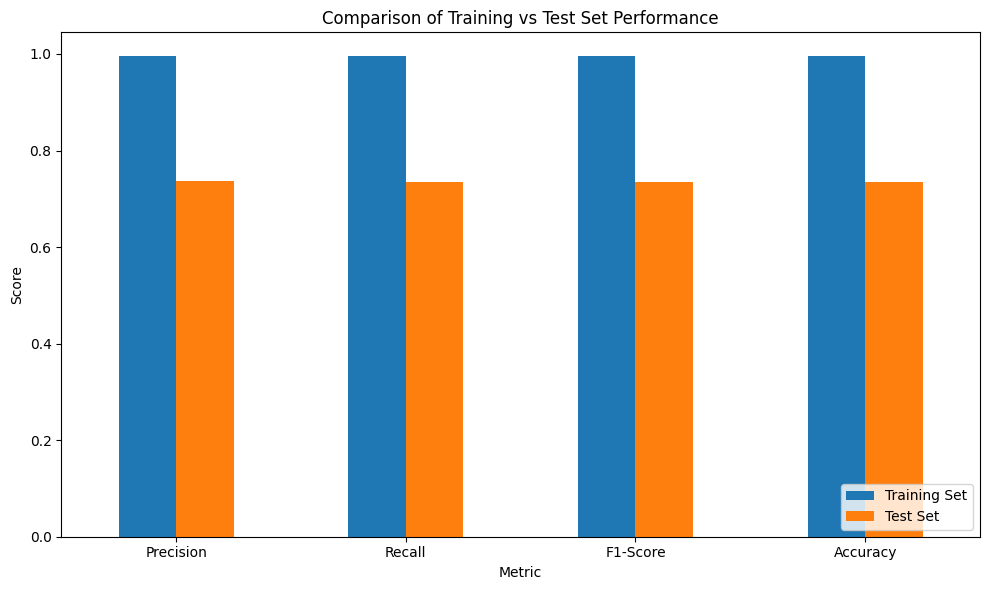

In [ ]:
import matplotlib.pyplot as plt

# Create a DataFrame for easy plotting
metrics_comparison = {
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Training Set': [train_precision, train_recall, train_f1, train_accuracy],
    'Test Set': [test_precision, test_recall, test_f1, test_accuracy],
}

df_comparison = pd.DataFrame(metrics_comparison)

# Plot comparison as a grouped bar chart
df_comparison.set_index('Metric').plot(kind='bar', figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])

# Add plot labels and title
plt.title('Comparison of Training vs Test Set Performance')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='lower right')

# Show the plot
plt.tight_layout()
plt.show()